# [현대 포트폴리오 이론](https://kwonkai.tistory.com/111)
- 현대 포트폴리오 이론 해리 맥스 마코위츠(Harry Max Markowitz)가 1952년 발표한 논문 [포트폴리오 셀렉션]에서 평균-분산 최적화(MVO : Mea-Variance-Optimization)를 제시했다.
- 평균-분산 최적화(MVO : Mea-Variance-Optimization)란 예상 수익률과 리스크의 상관관계를 활용하여 포트폴리오를 최적화하는 기법을 말한다.
- 이후 많은 투자자와 학자가 이 모델을 따랐으며, 해리 마코위츠는 1990년에 현대 포트폴리오이론을 창안한 업적으로 노벨 경제학상을 수상한다.

## 수익률의 표준편차
- 수익률의 표준편차(Standard deviation of returns)는 자산 가격이 평균값에서 벗어나는 저도인 RISH를 측정하는 방법이다.
- 주식시장에서 리스크는 주가의 변동성을 말한다.
- 정규분포 그래프에서 예상 수익률은 평균값인 μ(뮤) 로 나타내고, 리스크는 표준편차인 σ(시그마)로 나타낸다.

## 효율적 투자선
- 효율적투자선(Efficient Frontier)란 현대 포트폴리오 이론의 핵심개념이다.
- 투자자가 감수할 수 있는 리스크 수준에서 최상의 기대 수익률을 제공하는 포트폴리오 구성을 말한다.

## 코드

### 회사 코드 정보 

In [32]:
import os 
import dart_fss as dart 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dart.set_api_key(api_key=os.environ['DART_PSS_API_KEY'])

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

print(f'공시된 기업 전체 수: {len(corp_list)}')

Output()

Output()

Output()

공시된 기업 전체 수: 101528


In [11]:
# 코스피 기업정보들
stock_corps = [] 

for corp in corp_list:
    try:
        if corp.corp_cls == "Y" or corp.corp_cls == "K": # 코스피/코스탁 기업정보 KOSPI
            kospi_corp = {
                "corp_code": corp.corp_code if corp.corp_code else None,
                "corp_name": corp.corp_name if corp.corp_name else None,
                "stock_code": corp.stock_code if corp.stock_code else None, 
                "corp_cls": corp.corp_cls if corp.corp_cls else None,
                "corp_cls_nm": "kospi" if corp.corp_cls == "Y" else "kosdaq",
                "sector": corp.sector if corp.sector else None,
                "product": corp.product if corp.product else None
            }

            stock_corps.append(kospi_corp)

    except:
        pass

In [12]:
df_krx = pd.DataFrame(stock_corps)
df_krx['stock_code'] = df_krx['stock_code'].apply(lambda x : str(x).zfill(6))
print(df_krx.shape)
df_krx.head()

(2483, 7)


,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product
0,00956028,엑세스바이오,950130,K,kosdaq,의료용품 및 기타 의약 관련제품 제조업,"말라리아 진단키트(RDT), HIV 진단키트(RDT)"
1,00783246,글로벌에스엠,900070,K,kosdaq,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)"
2,01170962,GRT,900290,K,kosdaq,기타 금융업,"광학필름, 포장필름"
3,00600013,맵스리얼티1,094800,Y,kospi,신탁업 및 집합투자업,None
4,01139266,로스웰,900260,K,kosdaq,기타 금융업,"CAN Control Gateway, CAN기능모듈, BCM 차체제어모듈"


In [13]:
df_krx[df_krx['corp_name'] == '삼성전자']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product
1747,00126380,삼성전자,005930,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."


### 주식 조회 

In [14]:
import FinanceDataReader as fdr

In [15]:
df = pd.DataFrame()

for stock_code in df_krx['stock_code'].values:
    stock_code = str(stock_code)
    _df = fdr.DataReader(stock_code, '2000')
    _df['stock_code'] = stock_code
    _df.reset_index(inplace=True) 

    df = pd.concat([df,_df], ignore_index=True)

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,Change,stock_code
0,2013-05-30,9000,10350,9000,10350,481546,NaN,950130
1,2013-05-31,11900,11900,11750,11900,3147904,0.149758,950130
2,2013-06-03,12200,12350,11450,12150,5255396,0.021008,950130
3,2013-06-04,12150,12250,10600,11300,2711946,-0.069959,950130
4,2013-06-05,11300,11400,10200,10200,1512415,-0.097345,950130


### 시가총액 상위 5종목 데이터 조회 

In [19]:
stocks = ['삼성전자', 'LG에너지솔루션', '삼성바이오로직스', 'SK하이닉스', 'LG화학']
df_stocks = df_krx[df_krx['corp_name'].isin(stocks)]
df_stocks

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product
567,00164779,SK하이닉스,000660,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
1560,00356361,LG화학,051910,Y,kospi,기초 화학물질 제조업,"유화/기능/합성수지,재생섬유소,산업재,리튬이온전지,평광판,PVC 제조,도매"
1606,00877059,삼성바이오로직스,207940,Y,kospi,기초 의약물질 및 생물학적 제제 제조업,바이오의약품
1612,01515323,LG에너지솔루션,373220,Y,kospi,일차전지 및 축전지 제조업,"2차전지 (소형,ESS,자동차전지)"
1747,00126380,삼성전자,005930,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."


In [20]:
df_stocks = pd.merge(df, df_stocks, on='stock_code', how='inner')

df_stocks 

,Date,Open,High,Low,Close,Volume,Change,stock_code,corp_code,corp_name,corp_cls,corp_cls_nm,sector,product
0,2000-01-04,484852,519204,475037,505462,9275920,0.068463,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
1,2000-01-05,474056,489759,446574,453444,7414370,-0.102912,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
2,2000-01-06,461296,467185,424981,429888,6529140,-0.051949,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
3,2000-01-07,416148,439704,408296,425962,10492270,-0.009133,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
4,2000-01-10,431852,437741,422037,422037,8041690,-0.009214,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19091,2023-07-03,72700,73200,72600,73000,10722181,0.011080,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."
19092,2023-07-04,73400,73600,72900,73000,10214350,0.000000,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."
19093,2023-07-05,73000,73300,71900,72000,12310610,-0.013699,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."
19094,2023-07-06,71900,72400,71500,71600,14777667,-0.005556,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."


In [23]:
c1 = df_stocks['Date'] >= '2018-10-13'
c2 = df_stocks['Date'] <= '2022-12-23'
c = c1 & c2 

df_stocks = df_stocks.loc[c]

In [24]:
df_pivot = df_stocks.pivot(index='Date', columns='corp_name', values='Close')

df_pivot

corp_name,LG에너지솔루션,LG화학,SK하이닉스,삼성바이오로직스,삼성전자
Date,,,,,
2018-10-15,NaN,324500.0,70300.0,459558.0,43800.0
2018-10-16,NaN,318500.0,69700.0,462029.0,43600.0
2018-10-17,NaN,325000.0,70400.0,444733.0,44150.0
2018-10-18,NaN,317000.0,68700.0,438804.0,44050.0
2018-10-19,NaN,330000.0,70800.0,447698.0,43900.0
...,...,...,...,...,...
2022-12-19,482000.0,633000.0,79000.0,821000.0,59500.0
2022-12-20,487500.0,631000.0,78300.0,820000.0,58600.0
2022-12-21,477000.0,620000.0,78000.0,818000.0,58000.0


### 시가총액 상위 5종목의 일간 수익률, 연간수익률, 일간 리스크, 연간 리스크

- 5종목 일간 수익률

In [26]:
daily_ret = df_pivot.pct_change()
daily_ret

corp_name,LG에너지솔루션,LG화학,SK하이닉스,삼성바이오로직스,삼성전자
Date,,,,,
2018-10-15,NaN,NaN,NaN,NaN,NaN
2018-10-16,NaN,-0.018490,-0.008535,0.005377,-0.004566
2018-10-17,NaN,0.020408,0.010043,-0.037435,0.012615
2018-10-18,NaN,-0.024615,-0.024148,-0.013332,-0.002265
2018-10-19,NaN,0.041009,0.030568,0.020269,-0.003405
...,...,...,...,...,...
2022-12-19,-0.007209,-0.018605,0.007653,-0.016766,0.000000
2022-12-20,0.011411,-0.003160,-0.008861,-0.001218,-0.015126
2022-12-21,-0.021538,-0.017433,-0.003831,-0.002439,-0.010239


- 5종목 1년간 수익률 평균(252는 미국 1년 평균 개장일)

In [27]:
annual_ret = daily_ret.mean() * 252
annual_ret

corp_name
LG에너지솔루션   -0.031057
LG화학        0.250098
SK하이닉스      0.091363
삼성바이오로직스    0.217218
삼성전자        0.101269
dtype: float64

- 5종목 연간 리스크 = cov()함수를 이용한 일간변동률 의 공분산

In [28]:
daily_cov = daily_ret.cov()
daily_cov

corp_name,LG에너지솔루션,LG화학,SK하이닉스,삼성바이오로직스,삼성전자
corp_name,,,,,
LG에너지솔루션,0.000678,0.000265,0.000118,0.000067,0.000079
LG화학,0.000265,0.000772,0.000213,0.000195,0.000174
SK하이닉스,0.000118,0.000213,0.000533,0.000096,0.000267
삼성바이오로직스,0.000067,0.000195,0.000096,0.000644,0.000093
삼성전자,0.000079,0.000174,0.000267,0.000093,0.000260


- 5종목 1년간 리스크(252는 미국 1년 평균 개장일)

In [29]:
annual_cov = daily_cov * 252
annual_cov

corp_name,LG에너지솔루션,LG화학,SK하이닉스,삼성바이오로직스,삼성전자
corp_name,,,,,
LG에너지솔루션,0.170826,0.066827,0.029773,0.016892,0.019827
LG화학,0.066827,0.194506,0.053588,0.049164,0.043811
SK하이닉스,0.029773,0.053588,0.134362,0.024309,0.067169
삼성바이오로직스,0.016892,0.049164,0.024309,0.162287,0.023506
삼성전자,0.019827,0.043811,0.067169,0.023506,0.065640


### 시가총액 상위 5종목 20,000개 포트폴리오 생성 

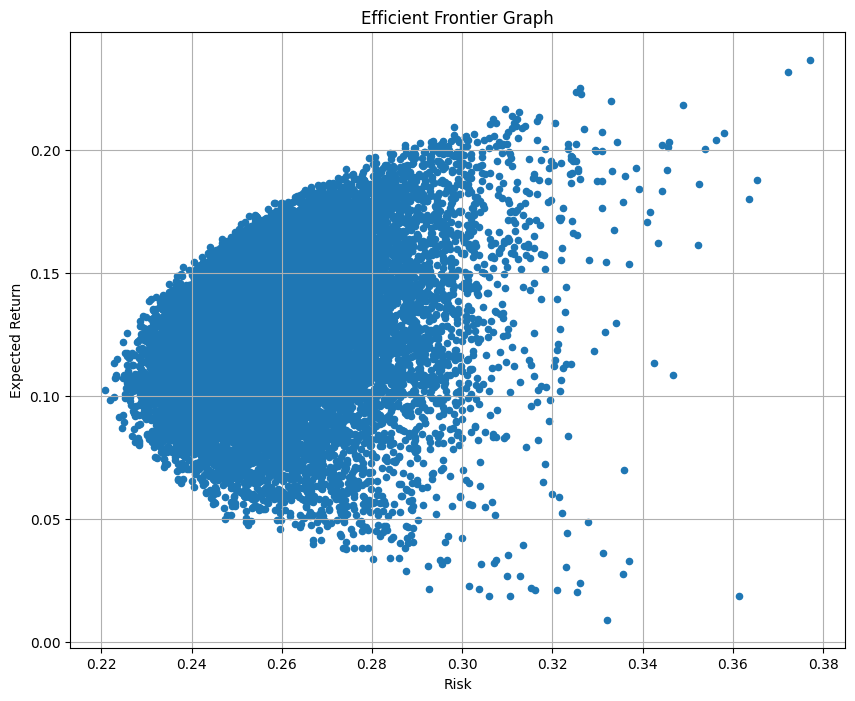

In [33]:
# 시가총액 5순위 주식의 비율을 다르게 해 20,000개 포트폴리오 생성
# 1. 수익률, 리스크, 비중 list 생성
# 수익률 = port_ret
# 리스크 = port_risk
# 비  중 = port_weights
port_ret = []
port_risk = []
port_weights = []

for i in range(20000):
    # 2. 랜덤 숫자 4개 생성 - 랜덤숫자 4개의 합 = 1이되도록 생성
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    # 3. 랜덤 생성된 종목별 비중 배열과 종목별 연간 수익률을 곱해 포트폴리오의 전체 수익률(returns)를 구한다.
    returns = np.dot(weights, annual_ret)

    # 4. 종목별 연간공분산과 종목별 비중배열 곱하고, 다시 종목별 비중의 전치로 곱한다.
    # 결과값의 제곱근을 sqrt()함수로 구하면 해당 포트폴리오 전체 risk가 구해진다. 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    # 5. 20,000개 포트폴리오의 수익률, 리스크, 종목별 비중을 각각 리스트에 추가한다.
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = {'Returns' : port_ret, 'Risk' : port_risk}
for j, s in enumerate(stocks):
    # 6. portfolio 4종목의 가중치 weights를 1개씩 가져온다.
    portfolio[s] = [weight[j] for weight in port_weights]

# 7. 최종 df는 시총 상위 5종목의 보유 비중에 따른 risk와 예상 수익률을 확인할 수 있다.
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

# 8. 효율적 투자선  그래프 그리기
df.plot.scatter(x='Risk', y='Returns', figsize=(10,8), grid=True)
plt.title('Efficient Frontier Graph')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()

최종 df는 시총 상위 5종목의 보유 비중에 따른 risk와 예상 수익률을 확인할 수 있다.

In [34]:
df

,Returns,Risk,삼성전자,LG에너지솔루션,삼성바이오로직스,SK하이닉스,LG화학
0,0.117435,0.259534,0.226346,0.256454,0.243302,0.089348,0.184549
1,0.194357,0.299219,0.061238,0.488408,0.089440,0.253461,0.107453
2,0.122622,0.254032,0.220254,0.067927,0.278011,0.372087,0.061721
3,0.166886,0.285286,0.190309,0.401996,0.030505,0.269715,0.107474
4,0.105067,0.259912,0.311498,0.178433,0.271274,0.182398,0.056396
...,...,...,...,...,...,...,...
19995,0.085225,0.252952,0.287975,0.136076,0.266795,0.038410,0.270744
19996,0.110853,0.249667,0.293211,0.128493,0.193237,0.268864,0.116195
19997,0.126506,0.256868,0.186911,0.238628,0.282118,0.148769,0.143575
19998,0.139803,0.269420,0.265757,0.269121,0.105298,0.299188,0.060636


# [샤프지수](https://kwonkai.tistory.com/112)
- 현대 포트폴리오 이론에 따르면 포트폴리오 별 개별 리스크가 주어졌을 때, 효율적 투자선보다 높은 수익률은 기대할 수 없다는 한계점을 가지고 있다.
- 리스크를 최소화하고 수익률을 최대화하는 포트폴리오는 어떻게 찾을 수 있을까?
- 현대 포트폴리오 이론을 개발한 해리 마코위츠의 초기 이론으로는 해결하기 힘들지만
- 해리 마코위츠의 제자인 윌리엄 샤프(William Shape)의 샤프지수로 해결할 수 있다.

$$
Sharp Ratio = { 포트폴리오 예상 수익률 - 무위험률 \over 수익률의 표준편차 }
$$

## 코드 

In [35]:
import os 
import dart_fss as dart 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### 회사 코드 조회 

In [36]:
dart.set_api_key(api_key=os.environ['DART_PSS_API_KEY'])

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

print(f'공시된 기업 전체 수: {len(corp_list)}')

공시된 기업 전체 수: 101528


In [37]:
# 코스피 기업정보들
stock_corps = [] 

for corp in corp_list:
    try:
        if corp.corp_cls == "Y" or corp.corp_cls == "K": # 코스피/코스탁 기업정보 KOSPI
            kospi_corp = {
                "corp_code": corp.corp_code if corp.corp_code else None,
                "corp_name": corp.corp_name if corp.corp_name else None,
                "stock_code": corp.stock_code if corp.stock_code else None, 
                "corp_cls": corp.corp_cls if corp.corp_cls else None,
                "corp_cls_nm": "kospi" if corp.corp_cls == "Y" else "kosdaq",
                "sector": corp.sector if corp.sector else None,
                "product": corp.product if corp.product else None
            }

            stock_corps.append(kospi_corp)

    except:
        pass

In [38]:
df_krx = pd.DataFrame(stock_corps)
df_krx['stock_code'] = df_krx['stock_code'].apply(lambda x : str(x).zfill(6))
print(df_krx.shape)
df_krx.head()

(2483, 7)


,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product
0,00956028,엑세스바이오,950130,K,kosdaq,의료용품 및 기타 의약 관련제품 제조업,"말라리아 진단키트(RDT), HIV 진단키트(RDT)"
1,00783246,글로벌에스엠,900070,K,kosdaq,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)"
2,01170962,GRT,900290,K,kosdaq,기타 금융업,"광학필름, 포장필름"
3,00600013,맵스리얼티1,094800,Y,kospi,신탁업 및 집합투자업,None
4,01139266,로스웰,900260,K,kosdaq,기타 금융업,"CAN Control Gateway, CAN기능모듈, BCM 차체제어모듈"


### 상위 5종목

In [39]:
stocks = ['삼성전자', 'LG에너지솔루션', '삼성바이오로직스', 'SK하이닉스', 'LG화학']
df_stocks = df_krx[df_krx['corp_name'].isin(stocks)]
df_stocks

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product
567,00164779,SK하이닉스,000660,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
1560,00356361,LG화학,051910,Y,kospi,기초 화학물질 제조업,"유화/기능/합성수지,재생섬유소,산업재,리튬이온전지,평광판,PVC 제조,도매"
1606,00877059,삼성바이오로직스,207940,Y,kospi,기초 의약물질 및 생물학적 제제 제조업,바이오의약품
1612,01515323,LG에너지솔루션,373220,Y,kospi,일차전지 및 축전지 제조업,"2차전지 (소형,ESS,자동차전지)"
1747,00126380,삼성전자,005930,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."


### 주식 조회 

In [40]:
import FinanceDataReader as fdr

In [41]:
df = pd.DataFrame()

for stock_code in df_stocks['stock_code'].values:
    stock_code = str(stock_code)
    _df = fdr.DataReader(stock_code, '2000')
    _df['stock_code'] = stock_code
    _df.reset_index(inplace=True) 

    df = pd.concat([df,_df], ignore_index=True)

In [42]:
df.head()

,Date,Open,High,Low,Close,Volume,Change,stock_code
0,2000-01-04,484852,519204,475037,505462,9275920,0.068463,000660
1,2000-01-05,474056,489759,446574,453444,7414370,-0.102912,000660
2,2000-01-06,461296,467185,424981,429888,6529140,-0.051949,000660
3,2000-01-07,416148,439704,408296,425962,10492270,-0.009133,000660
4,2000-01-10,431852,437741,422037,422037,8041690,-0.009214,000660


In [43]:
df_stocks = pd.merge(df, df_stocks, on='stock_code', how='inner')

df_stocks 

,Date,Open,High,Low,Close,Volume,Change,stock_code,corp_code,corp_name,corp_cls,corp_cls_nm,sector,product
0,2000-01-04,484852,519204,475037,505462,9275920,0.068463,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
1,2000-01-05,474056,489759,446574,453444,7414370,-0.102912,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
2,2000-01-06,461296,467185,424981,429888,6529140,-0.051949,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
3,2000-01-07,416148,439704,408296,425962,10492270,-0.009133,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
4,2000-01-10,431852,437741,422037,422037,8041690,-0.009214,000660,00164779,SK하이닉스,Y,kospi,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19091,2023-07-03,72700,73200,72600,73000,10722181,0.011080,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."
19092,2023-07-04,73400,73600,72900,73000,10214350,0.000000,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."
19093,2023-07-05,73000,73300,71900,72000,12310610,-0.013699,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."
19094,2023-07-06,71900,72400,71500,71600,14777667,-0.005556,005930,00126380,삼성전자,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조..."


In [44]:
c1 = df_stocks['Date'] >= '2018-10-13'
c2 = df_stocks['Date'] <= '2022-12-23'
c = c1 & c2 

df_stocks = df_stocks.loc[c]

In [45]:
df_pivot = df_stocks.pivot(index='Date', columns='corp_name', values='Close')

df_pivot

corp_name,LG에너지솔루션,LG화학,SK하이닉스,삼성바이오로직스,삼성전자
Date,,,,,
2018-10-15,NaN,324500.0,70300.0,459558.0,43800.0
2018-10-16,NaN,318500.0,69700.0,462029.0,43600.0
2018-10-17,NaN,325000.0,70400.0,444733.0,44150.0
2018-10-18,NaN,317000.0,68700.0,438804.0,44050.0
2018-10-19,NaN,330000.0,70800.0,447698.0,43900.0
...,...,...,...,...,...
2022-12-19,482000.0,633000.0,79000.0,821000.0,59500.0
2022-12-20,487500.0,631000.0,78300.0,820000.0,58600.0
2022-12-21,477000.0,620000.0,78000.0,818000.0,58000.0


### 시가총액 상위 5종목의 일간 수익률, 연간수익률, 일간 리스크, 연간 리스크

In [46]:
# 5종목 일간 변동률
daily_ret = df_pivot.pct_change()
# 5종목 1년간 변동률 평균(252는 미국 1년 평균 개장일)
annual_ret = daily_ret.mean() * 252

# 5종목 연간 리스크 = cov()함수를 이용한 일간변동률 의 공분산
daily_cov = daily_ret.cov()
# 5종목 1년간 리스크(252는 미국 1년 평균 개장일)
annual_cov = daily_cov * 252

### 시가총액 5순위 주식의 비율을 다르게 해 20,000개 포트폴리오 생성

In [47]:
# 1. 수익률, 리스크, 비중 list 생성
# 수익률 = port_ret
# 리스크 = port_risk
# 비  중 = port_weights
port_ret = []
port_risk = []
port_weights = []
# 샤프지수 추가
shape_ratio = []

for i in range(20000):
    # 2. 랜덤 숫자 4개 생성 - 랜덤숫자 4개의 합 = 1이되도록 생성
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    # 3. 랜덤 생성된 종목뵹 비중 배열과 종목별 연간 수익률을 곱해 포트폴리오의 전체 수익률(returns)를 구한다.
    returns = np.dot(weights, annual_ret)

    # 4. 종목별 연간공분산과 종목별 비중배열 곱하고, 다시 종목별 비중의 전치로 곱한다.
    # 결과값의 제곱근을 sqrt()함수로 구하면 해당 포트폴리오 전체 risk가 구해진다. 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    # 5. 20,000개 포트폴리오의 수익률, 리스크, 종목별 비중을 각각 리스트에 추가한다.
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    shape_ratio.append(returns/risk)

### 포트폴리오 결과에 샤프지수 추가

In [48]:
portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
for j, s in enumerate(stocks):
    # 6. portfolio 4종목의 가중치 weights를 1개씩 가져온다.
    portfolio[s] = [weight[j] for weight in port_weights]

### rist와 예상 수익률 

In [49]:
# 7. 최종 df는 시총 상위 5종목의 보유 비중에 따른 risk와 예상 수익률을 확인할 수 있다.
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Shape'] + [s for s in stocks]]

### 샤프지수로 위험단위당 예측 수익률이 가장 높은 포트폴리오 구하기

In [50]:
# 8. 샤프지수로 위험단위당 예측 수익률이 가장 높은 포트폴리오 구하기
# 샤프지수 칼럼에서 가장 높은 샤프지수 구하기
max_shape = df.loc[df['Shape'] == df['Shape'].max()]

### 리스크칼럼에서 가장 낮은 리스크 구하기

In [51]:
# 리스크칼럼에서 가장 낮은 리스크 구하기
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

### 샤프지수 그래프 그리기

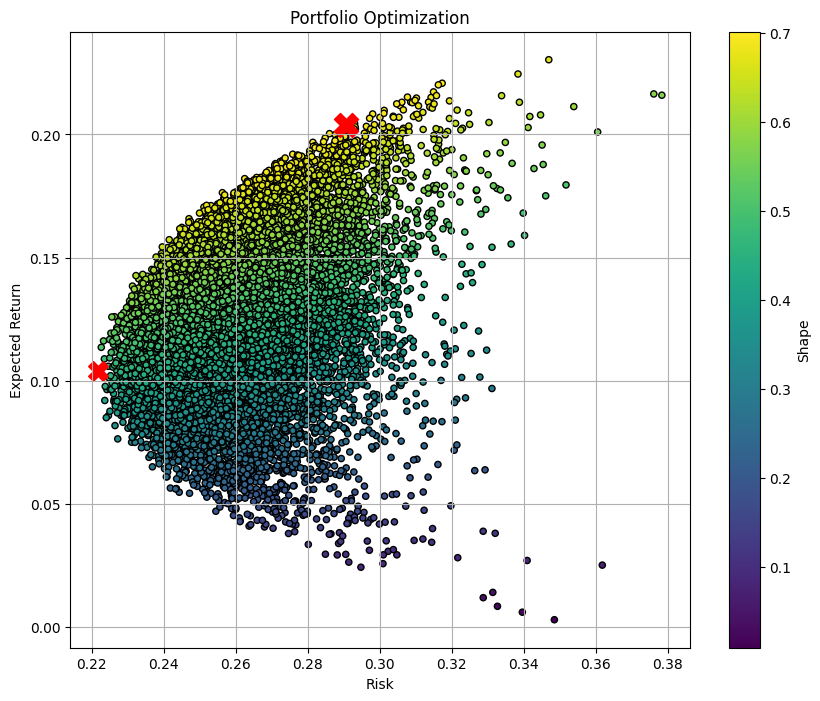

In [52]:
# 샤프지수 그래프 그리기
df.plot.scatter(x='Risk', y='Returns', c='Shape', cmap='viridis', edgecolors='k', figsize=(10,8), grid=True)
plt.scatter(x=max_shape['Risk'], y=max_shape['Returns'], c='r', marker='X', s=300)
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()

포트폴리오 변수에 샤프지수인 shape가 포함된 것을 확입할 수 있다.

In [53]:
df

,Returns,Risk,Shape,삼성전자,LG에너지솔루션,삼성바이오로직스,SK하이닉스,LG화학
0,0.143156,0.250073,0.572457,0.048746,0.052040,0.256629,0.372011,0.270574
1,0.143596,0.282001,0.509204,0.245660,0.408864,0.013870,0.121783,0.209824
2,0.122880,0.246041,0.499430,0.167250,0.177702,0.265928,0.171883,0.217237
3,0.102430,0.254984,0.401713,0.331404,0.184545,0.165137,0.165461,0.153453
4,0.122690,0.243599,0.503658,0.263373,0.144608,0.021630,0.301554,0.268835
...,...,...,...,...,...,...,...,...
19995,0.146898,0.262593,0.559414,0.026948,0.132631,0.405010,0.288642,0.146769
19996,0.138608,0.273868,0.506112,0.165448,0.394609,0.050485,0.008647,0.380810
19997,0.160046,0.261046,0.613095,0.015538,0.082746,0.228768,0.437984,0.234964
19998,0.052238,0.258993,0.201696,0.446598,0.031671,0.192490,0.062602,0.266639


가장 높은 샤프지수 확인 

In [54]:
max_shape

,Returns,Risk,Shape,삼성전자,LG에너지솔루션,삼성바이오로직스,SK하이닉스,LG화학
4177,0.203848,0.290752,0.701106,0.008725,0.401869,0.007036,0.379421,0.20295
